In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [3]:
data_01 = make_blobs(
    n_samples = 200,
    n_features = 2,
    centers = 4,
    cluster_std = 1.8,
    random_state = 101
)

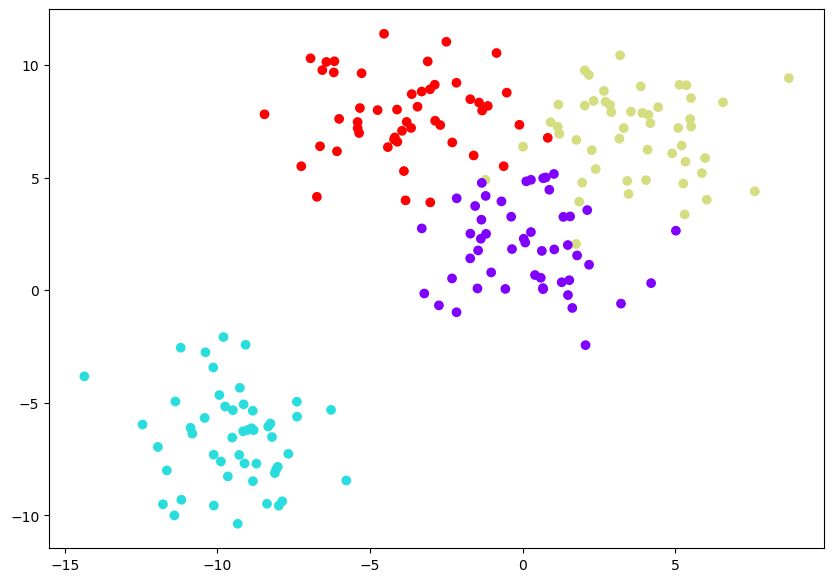

In [7]:
plt.figure(figsize = (10, 7))
plt.scatter(
    data_01[0][:,0],
    data_01[0][:,1],
    c = data_01[1],
    cmap = 'rainbow'
)

In [13]:
# K Means model creation 

kmeans = KMeans(
    n_clusters = 4
)
kmeans.fit(
    data_01[0]
)

KMeans(n_clusters=4)

In [17]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-0.0123077 ,  2.13407664]])

In [19]:
kmeans.labels_

array([0, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 3,
       3, 1, 0, 1, 1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 1, 3, 1, 0, 0, 0,
       3, 2, 0, 3, 1, 3, 3, 0, 2, 3, 1, 0, 3, 3, 0, 2, 1, 2, 1, 0, 2, 3,
       1, 2, 2, 1, 2, 3, 1, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 1, 3, 3, 3, 0,
       3, 1, 1, 1, 1, 3, 3, 1, 2, 0, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2, 0, 3, 1, 0, 0, 0,
       3, 1, 1, 0, 2, 0, 2, 3, 1, 2, 1, 0, 0, 2, 3, 1, 0, 0, 0, 0, 3, 2,
       3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 1, 0, 3, 2, 0, 3, 2, 3, 0, 2, 3, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 1, 3, 2, 2,
       1, 3], dtype=int32)

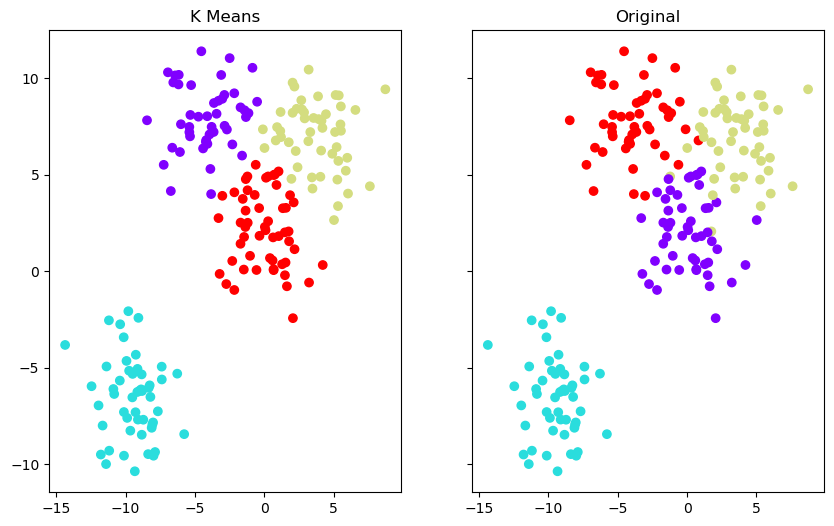

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (10, 6))

ax1.set_title('K Means')
ax1.scatter(
    data_01[0][:,0],
    data_01[0][:,1],
    c = kmeans.labels_,
    cmap = 'rainbow'
)

ax2.set_title('Original')
ax2.scatter(
    data_01[0][:,0],
    data_01[0][:,1],
    c = data_01[1],
    cmap = 'rainbow'
    
)

# practical project beginning 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix


In [148]:
data_02 = pd.read_csv(f'College_Data', index_col = 0)
data_v2 = data_02.copy()

In [150]:
data_v2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [42]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [44]:
data_v2.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# EDA Section 

In [56]:
data_v2.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

Text(0, 0.5, 'Room Board')

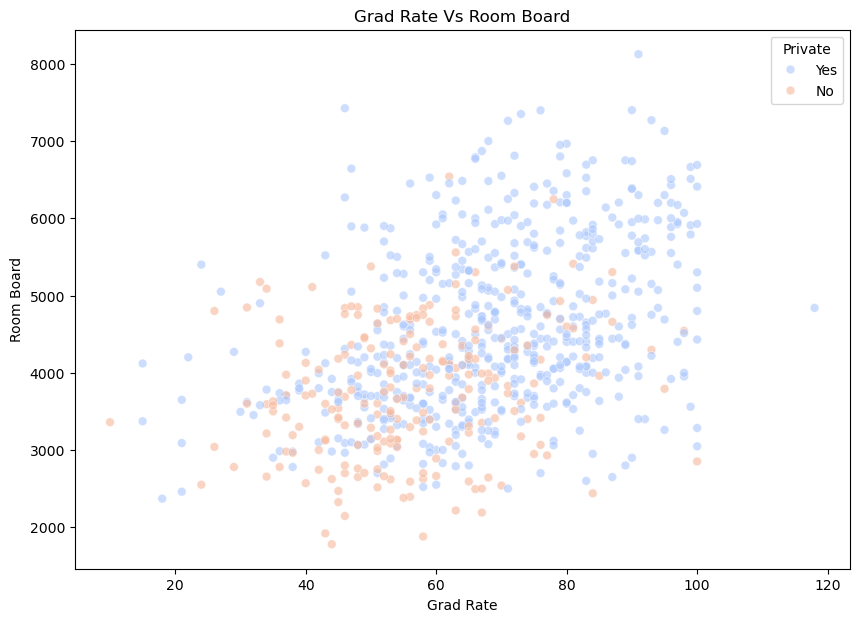

In [92]:
plt.figure(figsize = (10, 7))
sns.scatterplot(
    data = data_v2,
    x = 'Grad.Rate', y = 'Room.Board',
    hue = 'Private',
    palette = 'coolwarm',
    s = 40,
    alpha = 0.6
)
plt.title('Grad Rate Vs Room Board')
plt.xlabel('Grad Rate')
plt.ylabel('Room Board')

Text(0, 0.5, 'Outstate')

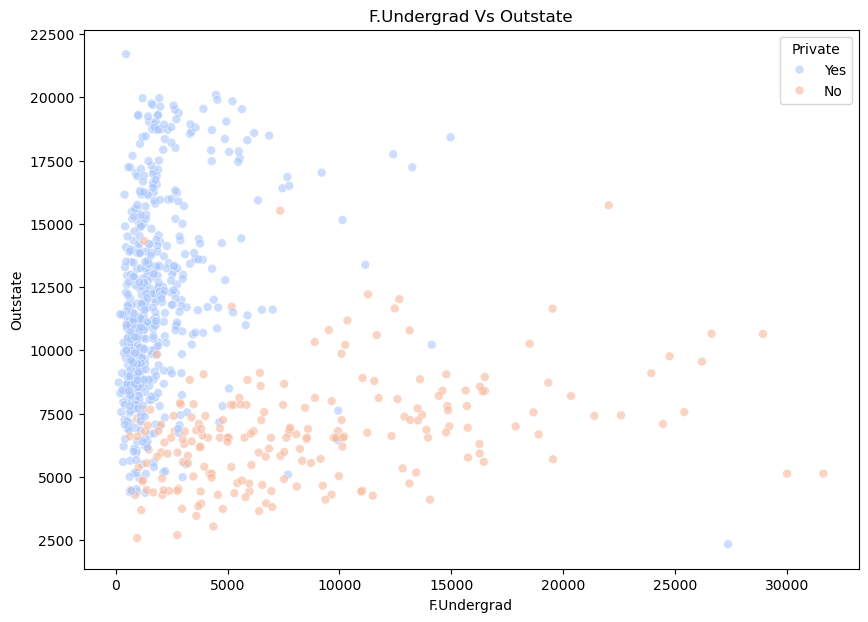

In [94]:
plt.figure(figsize = (10, 7))
sns.scatterplot(
    data = data_v2,
    x = 'F.Undergrad', y = 'Outstate',
    hue = 'Private',
    palette = 'coolwarm',
    s = 40,
    alpha = 0.6
)
plt.title('F.Undergrad Vs Outstate')
plt.xlabel('F.Undergrad')
plt.ylabel('Outstate')

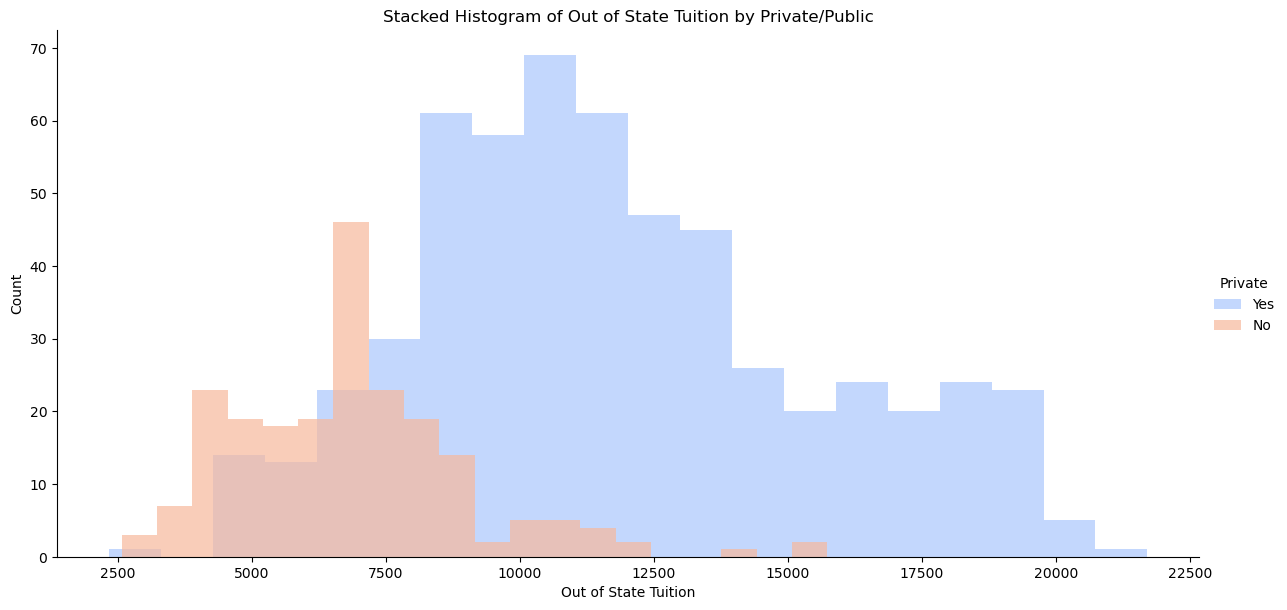

In [108]:
# Create a FacetGrid
g = sns.FacetGrid(data_v2, hue='Private', palette = 'coolwarm', height=6, aspect=2)

# Map a histogram to the grid
g.map(plt.hist, 'Outstate', bins=20, alpha=0.7)

# Add labels and title
g.set_axis_labels('Out of State Tuition', 'Count')
plt.title('Stacked Histogram of Out of State Tuition by Private/Public')

# Add a legend
g.add_legend()

# Show the plot
plt.show()

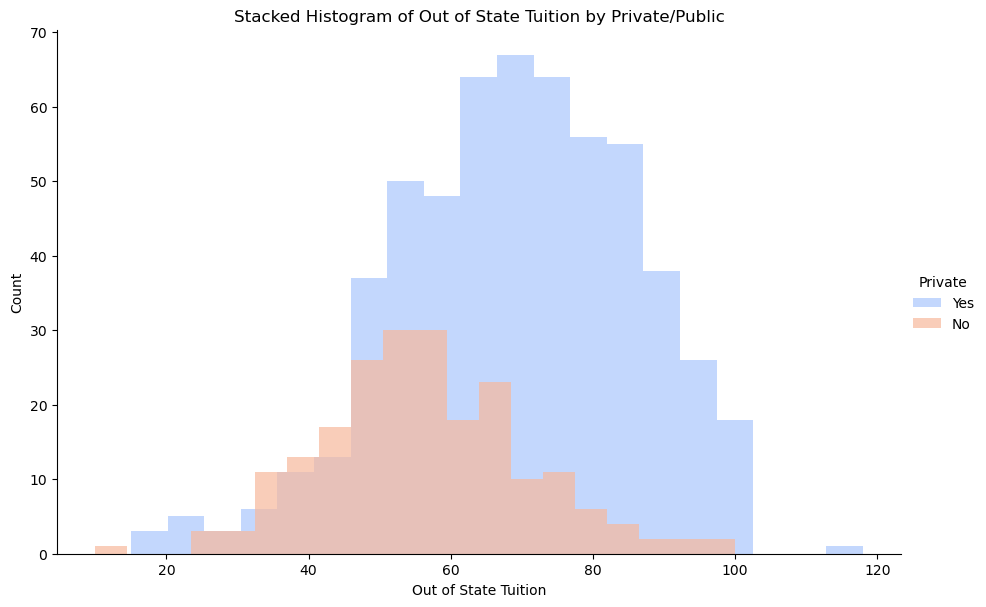

In [112]:
# Create a FacetGrid
g = sns.FacetGrid(data_v2, hue='Private', palette = 'coolwarm', height=6, aspect=1.5)

# Map a histogram to the grid
g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7, stacked=True)

# Add labels and title
g.set_axis_labels('Out of State Tuition', 'Count')
plt.title('Stacked Histogram of Out of State Tuition by Private/Public')

# Add a legend
g.add_legend()

# Show the plot
plt.show()

In [118]:
data_02[data_02['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [130]:
data_v2['Grad.Rate']['Cazenovia College'] = 100

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_12225/2010491058.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_v2['Grad.Rate']['Cazenovia College'] = 100
/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_12225/

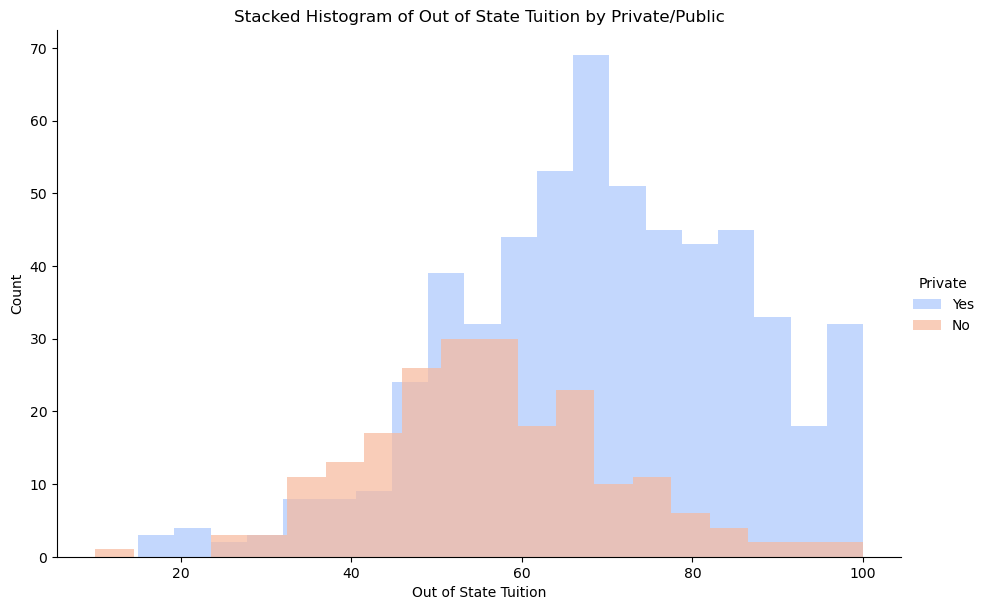

In [132]:
# Create a FacetGrid
g = sns.FacetGrid(data_v2, hue='Private', palette = 'coolwarm', height=6, aspect=1.5)

# Map a histogram to the grid
g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7, stacked=True)

# Add labels and title
g.set_axis_labels('Out of State Tuition', 'Count')
plt.title('Stacked Histogram of Out of State Tuition by Private/Public')

# Add a legend
g.add_legend()

# Show the plot
plt.show()

In [134]:
kmeans = KMeans(
    n_clusters = 2
)
kmeans.fit(
    data_v2.drop(columns = ['Private'], axis = 1)
)

KMeans(n_clusters=2)

In [136]:
kmeans.cluster_centers_

array([[1.94782101e+03, 1.31368639e+03, 4.86974852e+02, 2.67500000e+01,
        5.45857988e+01, 2.11855178e+03, 5.43665680e+02, 1.07181509e+04,
        4.37916420e+03, 5.44346154e+02, 1.26384320e+03, 7.10266272e+01,
        7.82988166e+01, 1.37792899e+01, 2.37071006e+01, 9.61601627e+03,
        6.59896450e+01],
       [1.00549109e+04, 6.73820792e+03, 2.74102970e+03, 3.29702970e+01,
        6.39009901e+01, 1.42840297e+04, 2.94107921e+03, 8.58346535e+03,
        4.21270297e+03, 5.83079208e+02, 1.85466337e+03, 8.35940594e+01,
        8.90990099e+01, 1.61673267e+01, 1.62970297e+01, 9.95570297e+03,
        6.17623762e+01]])

In [152]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0

data_v2['Cluster'] = data_v2['Private'].apply(converter)

In [154]:
data_v2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [156]:
print(confusion_matrix(data_v2['Cluster'], kmeans.labels_))
print(classification_report(data_v2['Cluster'], kmeans.labels_))

[[123  89]
 [553  12]]
              precision    recall  f1-score   support

           0       0.18      0.58      0.28       212
           1       0.12      0.02      0.04       565

    accuracy                           0.17       777
   macro avg       0.15      0.30      0.16       777
weighted avg       0.14      0.17      0.10       777

